# Supervised Learning with scikit-learn

**Machine learning** is the field that teaches machines and computers to learn from existing data to make predictions on new data: Will a tumor be benign or malignant? Which of your customers will take their business elsewhere? Is a particular email spam? In this notebook, you'll learn how to use Python to perform **supervised learning**, an essential component of **machine learning**. You'll learn how to build predictive models, tune their parameters, and determine how well they will perform with unseen data—all while using real world datasets. You'll be using **scikit-learn**, one of the most popular and user-friendly machine learning libraries for Python.

## Which of these is a classification problem?

Once you decide to leverage supervised machine learning to solve a new problem, you need to identify whether your problem is better suited to **classification** or **regression**. This exercise will help you develop your intuition for distinguishing between the two.

Provided below are 4 example applications of machine learning. Which of them is a supervised classification problem?

- Using labeled financial data to predict whether the value of a stock will go up or go down next week. (correct)
- Using labeled housing price data to predict the price of a new house based on various features.
- Using unlabeled data to cluster the students of an online education company into different categories based on their learning styles.
- Using labeled financial data to predict what the value of a stock will be next week.

In this example, there are two discrete, qualitative outcomes: the stock market going up, and the stock market going down. This can be represented using a binary variable, and is an application perfectly suited for classification.

## Numerical EDA

In this chapter, you'll be working with a dataset obtained from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) consisting of votes made by US House of Representatives Congressmen. Your goal will be to predict their party affiliation ('Democrat' or 'Republican') based on how they voted on certain key issues. Here, it's worth noting that we have preprocessed this dataset to deal with missing values. This is so that your focus can be directed towards understanding how to train and evaluate supervised learning models. Once you have mastered these fundamentals, you will be introduced to preprocessing techniques and have the chance to apply them there yourself - including on this very same dataset!

Before thinking about what supervised learning models you can apply to this, however, you need to perform **Exploratory data analysis (EDA)** in order to understand the structure of the data.

Get started with your EDA now by exploring this voting records dataset numerically. It has been pre-loaded for you into a DataFrame called `df`. Use pandas' `.head()`, `.info()`, and `.describe()` methods in the IPython Shell to explore the DataFrame, and select the statement below that is not true.

- The DataFrame has a total of 435 rows and 17 columns.
- Except for 'party', all of the columns are of type int64.
- The first two rows of the DataFrame consist of votes made by Republicans and the next three rows consist of votes made by Democrats.
- There are 17 predictor variables, or features, in this DataFrame. (not true)
- The target variable in this DataFrame is 'party'.

The number of columns in the DataFrame is not equal to the number of features. One of the columns - 'party' is the target variable.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

path = 'data/dc18/'

In [5]:
df = pd.read_csv(path+'congres.csv', index_col=0)
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435 entries, 0 to 434
Data columns (total 17 columns):
party                435 non-null object
infants              435 non-null int64
water                435 non-null int64
budget               435 non-null int64
physician            435 non-null int64
salvador             435 non-null int64
religious            435 non-null int64
satellite            435 non-null int64
aid                  435 non-null int64
missile              435 non-null int64
immigration          435 non-null int64
synfuels             435 non-null int64
education            435 non-null int64
superfund            435 non-null int64
crime                435 non-null int64
duty_free_exports    435 non-null int64
eaa_rsa              435 non-null int64
dtypes: int64(16), object(1)
memory usage: 61.2+ KB


In [7]:
df.describe()

,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,0.429885,0.558621,0.606897,0.406897,0.521839,0.650575,0.581609,0.590805,0.526437,0.512644,0.344828,0.393103,0.537931,0.609195,0.400000,0.857471
std,0.495630,0.497123,0.489002,0.491821,0.500098,0.477337,0.493863,0.492252,0.499876,0.500416,0.475859,0.489002,0.499133,0.488493,0.490462,0.349994
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Visual EDA

The **numerical EDA** you did in the previous exercise gave you some very important information, such as the names and data types of the columns, and the dimensions of the DataFrame. Following this with some **visual EDA** will give you an even better understanding of the data. You may have noticed in the previous exercise that all the features in this dataset are binary; that is, they are either 0 or 1. So a type of plot such as [Seaborn's countplot](http://seaborn.pydata.org/generated/seaborn.countplot.html) would be useful here.

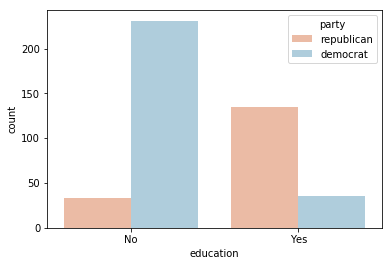

In [10]:
plt.figure()
sns.countplot(x='education', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

In `sns.countplot()`, we specify the x-axis data to be 'education', and hue to be 'party'. Recall that 'party' is also our **target variable**. So the resulting plot shows the difference in voting behavior between the two parties for the 'education' bill, with each party colored differently. We manually specified the color to be `'RdBu'`, as the Republican party has been traditionally associated with red, and the Democratic party with blue.

It seems like Democrats voted resoundingly against this bill, compared to Republicans. This is the kind of information that our machine learning model will seek to learn when we try to predict party affiliation solely based on voting behavior. An expert in U.S politics may be able to predict this without machine learning, but probably not instantaneously - and certainly not if we are dealing with hundreds of samples!

Explore the voting behavior further by generating countplots for the 'satellite' and 'missile' bills, and answer the following question: Of these two bills, for which ones do Democrats vote resoundingly in favor of, compared to Republicans? Be sure to begin your plotting statements for each figure with `plt.figure()` so that a new figure will be set up. Otherwise, your plots will be overlayed onto the same figure.

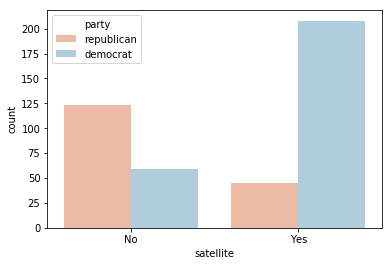

In [11]:
plt.figure()
sns.countplot(x='satellite', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

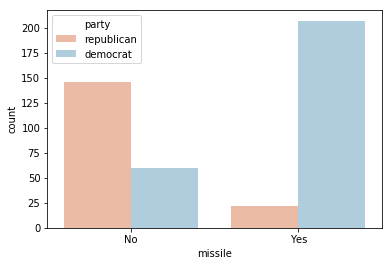

In [12]:
plt.figure()
sns.countplot(x='missile', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()